EJERCICIO 1

In [1]:
nu= var('nu')
x = var('x')
y = var('y')
z = var('z')
u = var('u')
v = var('v')
w = var('w')
r1 = ( ( x + nu )^2 + y^2 + z^2 )^0.5
r2 = ( ( x - (1-nu) )^2 + y^2 + z^2 )^0.5
dx = u
dy = v
dz = w
du = x + 2*v - ( (1-nu)*(x+nu)/r1^3 + nu*(x-(1-nu))/r2^3 )
dv = y - 2*u - ( (1-nu)*y/r1^3 + nu*y/r2^3 )
dw = - ( (1-nu)*z/r1^3 + nu*z/r2^3 )
# X(dx,dy,dz,du,dv,dw)=[dx,dy,dz,du,dv,dw]

In [2]:
# JL
X(x,y,z,u,v,w)=[dx,dy,dz,du,dv,dw]
show(X)

(x, y, z, u, v, w) |--> (u, v, w, 2*v + x + (nu + x)*(nu - 1)/((nu + x)^2 + y^2 + z^2)^1.50000000000000 - (nu + x - 1)*nu/((nu + x - 1)^2 + y^2 + z^2)^1.50000000000000, -2*u + y + (nu - 1)*y/((nu + x)^2 + y^2 + z^2)^1.50000000000000 - nu*y/((nu + x - 1)^2 + y^2 + z^2)^1.50000000000000, (nu - 1)*z/((nu + x)^2 + y^2 + z^2)^1.50000000000000 - nu*z/((nu + x - 1)^2 + y^2 + z^2)^1.50000000000000)

In [3]:
# Ahora calculamos los puntos de equilibrio. En lugar de dejar a Sage que los calcule,
# es fácil ver que las tres primeras equaciones son u=0, v=0, w=0, así que lo sustituímos.
# Además, se pedía sólo cuando y=z=0
X(x,0,0,0,0,0)

(0, 0, 0, x + (nu + x)*(nu - 1)/((nu + x)^2)^1.50000000000000 - (nu + x - 1)*nu/((nu + x - 1)^2)^1.50000000000000, 0, 0)

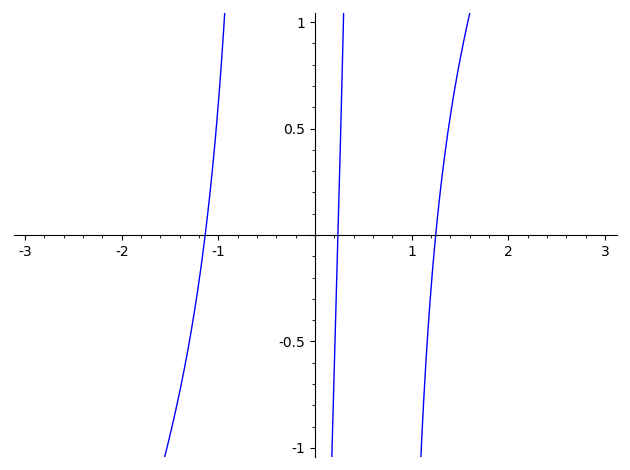

In [4]:
# Sage no es capaz de resolver la ecuación en general, así que fijamos nu. Por ejemplo nu=1/3
f(x) = X(x,0,0,0,0,0)(nu=1/3)[3]
# Evito donde se anula el denominador
plot(f,(-3,-1/3),ymax=1,ymin=-1)+plot(f,(-1/3,2/3),ymax=1,ymin=-1)+plot(f,(2/3,3),ymax=1,ymin=-1)

In [5]:
# Ahora los calculamos numéricamente
l1 = f.find_root(-1.5,-1)
l2 = f.find_root(0.1,0.4)
l3 = f.find_root(1,1.5)
# Los puntos de equilibrio son (u,v,w) son nulos
(l1,0,0), (l2,0,0), (l3,0,0)

((-1.1363612939916876, 0, 0),
 (0.23741823818519336, 0, 0),
 (1.249047388880329, 0, 0))

In [6]:
# Calculamos los autovalores en el primer punto.
M = matrix(RDF, jacobian(X(x,y,z,u,v,w)(nu=1./3),(x,y,z,u,v,w))(x=l1,y=0.,z=0.,u=0.,v=0.,w=0.))
M.eigenvalues()

[0.9196510525752492,
 -0.9196510525752494,
 1.2253489399724005*I,
 -1.2253489399724005*I,
 1.1594300469675947*I,
 -1.1594300469675947*I]

In [7]:
# Calculamos los autovalores en el segundo punto.
M = matrix(RDF, jacobian(X(x,y,z,u,v,w)(nu=1./3),(x,y,z,u,v,w))(x=l2,y=0.,z=0.,u=0.,v=0.,w=0.))
M.eigenvalues()

[-3.7300929281850688,
 3.730092928185069,
 -4.996003610813204e-16 + 2.8484002314631724*I,
 -4.996003610813204e-16 - 2.8484002314631724*I,
 2.7928854925142934*I,
 -2.7928854925142934*I]

In [8]:
# Calculamos los autovalores en el tercer punto.
M = matrix(RDF, jacobian(X(x,y,z,u,v,w)(nu=1./3),(x,y,z,u,v,w))(x=l3,y=0.,z=0.,u=0.,v=0.,w=0.))
M.eigenvalues()

[1.391851453920751,
 -1.3918514539207512,
 1.4427189870865262*I,
 -1.4427189870865262*I,
 1.3622820537911147*I,
 -1.3622820537911147*I]

In [9]:
# En todos hay autovalores imaginarios puros, luego podría haber órbitas cerradas

TAREA 2

In [10]:
# Fijamos el valor de nu y, por tanto un ejemplo concreto
X(x,y,z,u,v,w)=[f(nu=2/3) for f in X(x,y,z,u,v,w)]
show(X)

(x, y, z, u, v, w) |--> (u, v, w, 2*v + x - 1/9*(3*x + 2)/(1/9*(3*x + 2)^2 + y^2 + z^2)^1.50000000000000 - 2/9*(3*x - 1)/(1/9*(3*x - 1)^2 + y^2 + z^2)^1.50000000000000, -2*u + y - 1/3*y/(1/9*(3*x + 2)^2 + y^2 + z^2)^1.50000000000000 - 2/3*y/(1/9*(3*x - 1)^2 + y^2 + z^2)^1.50000000000000, -1/3*z/(1/9*(3*x + 2)^2 + y^2 + z^2)^1.50000000000000 - 2/3*z/(1/9*(3*x - 1)^2 + y^2 + z^2)^1.50000000000000)

In [11]:
@cached_function
def DT(X,n):
    if n==0:
        return X
    return (DT(X,n-1).diff()*X)

In [12]:
def elemento_serie(X,x0,h,j):
    # Devuelve un sumando del desarrollo en serie
    return DT(X,j)(*x0)*h^j/factorial(j+1)

def taylor(X,x0,t1,n,m):
    # Método de Taylor de orden m
    # X campo
    # x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    xk = (n+1)*[(0.,0.,0.,0.,0.,0.)]
    h = t1/n
    xk[0] = vector(RDF,x0)
    for k in [0..n-1]:
        # phi f0 + f1*h/2! + f2*h^2/3! ... f(m-1)*h^(m-1)/m!
        phi = sum([ elemento_serie(X,xk[k],h,j) for j in [0..(m-1)]])
        xk[k+1] = xk[k] + h * phi
    return xk

In [13]:
x1=(l1,0.05,0,0.,0.,0)

In [14]:
taylor1=taylor(X,x1,4,6500,3)
taylor1

[(-1.1363612939916876, 0.05, 0.0, 0.0, 0.0, 0.0),
 (-1.1363611695299116, 0.049999977486616075, 0.0, 0.0004044858944179235, -7.325147561376248e-05, 0.0),
 (-1.136360796181235, 0.04999990974221025, 0.0, 0.0008088825250786749, -0.00014700081841032407, 0.0),
 (-1.136360174000409, 0.04999979646040782, 0.0, 0.0012131904774644047, -0.00022124801184518378, 0.0),
 (-1.1363593030418246, 0.049999637334844194, 0.0, 0.0016174103370229292, -0.0002959930396332919, 0.0),
 (-1.1363581833595129, 0.04999943205916471, 0.0, 0.0020215426891739123, -0.000371235885749373, 0.0),
 (-1.1363568150071444, 0.049999180327024495, 0.0, 0.0024255881193150463, -0.00044697653442824674, 0.0),
 (-1.1363551980380293, 0.049998881832088296, 0.0, 0.0028295472128282316, -0.0005232149701651453, 0.0),
 (-1.1363533325051178, 0.049998536268030316, 0.0, 0.0032334205550857537, -0.0005999511777160292, 0.0),
 (-1.1363512184609998, 0.04999814332853406, 0.0, 0.0036372087314564625, -0.0006771851420979, 0.0),
 (-1.1363488559579051, 0.04999

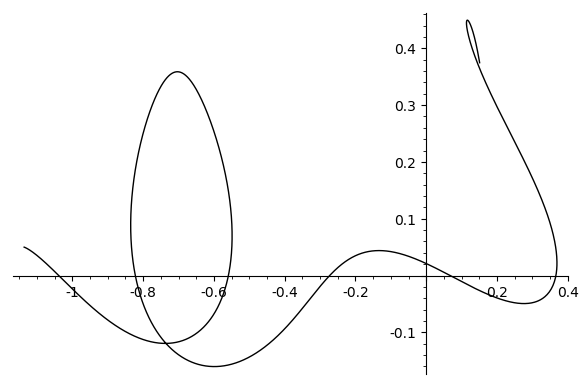

In [15]:
d1 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in taylor1],color='black')
d1

In [16]:
x2=(l2,0.,0.,0.0,0.0,0.)

In [17]:
taylor2=taylor(X,x2,0.01,1000,3)
taylor2

[(0.23741823818519336, 0.0, 0.0, 0.0, 0.0, 0.0),
 (0.23741824179997806, -2.40985646487093e-14, 0.0, 0.000722956957643029, -7.22956939461280e-9, 0.0),
 (0.23741825264433278, -1.92788519006645e-13, 0.0, 0.00144591402437657, -2.89182782143906e-8, 0.0),
 (0.23741827071825916, -6.50661264593334e-13, 0.0, 0.00216887130929124, -6.50661280946059e-8, 0.0),
 (0.23741829602175996, -1.54230822473193e-12, 0.0, 0.00289182892147781, -1.15673121760711e-7, 0.0),
 (0.23741832855483896, -3.01232085545102e-12, 0.0, 0.00361478697002737, -1.80739263028338e-7, 0.0),
 (0.2374183683175011, -5.20529065638637e-12, 0.0, 0.00433774556403132, -2.60264556803294e-7, 0.0),
 (0.23741841530975236, -8.26580918168269e-12, 0.0, 0.00506070481258154, -3.54249009081559e-7, 0.0),
 (0.2374184695315998, -1.23384680508954e-11, 0.0, 0.00578366482477046, -4.62692626949280e-7, 0.0),
 (0.23741853098305166, -1.75678589598920e-11, 0.0, 0.00650662570969114, -5.85595418582771e-7, 0.0),
 (0.23741859966411719, -2.40985736917543e-11, 0.0, 0

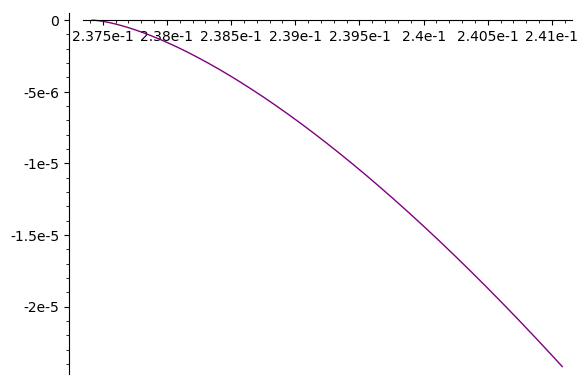

In [18]:
d2 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in taylor2],color='purple')
d2

In [19]:
x3=(l3,0.001,0,0.,0.,0)

In [20]:
taylor3=taylor(X,x3,0.5,3000,3)
taylor3

[(1.249047388880329, 0.001, 0.0, 0.0, 0.0, 0.0),
 (1.2490473939245146, 0.001000000000611356, 0.0, 0.0000605302259867116, 3.97348275163170e-9, 0.0),
 (1.2490474090570713, 0.0010000000002035644, 0.0, 0.000121060454695586, -1.22297720878337e-8, 0.0),
 (1.2490474342779996, 0.0009999999954138357, 0.0, 0.000181590684161500, -4.86097602288580e-8, 0.0),
 (1.2490474695872993, 0.0009999999828793815, 0.0, 0.000242120912419332, -1.05166476774153e-7, 0.0),
 (1.2490475149849702, 0.0009999999592374142, 0.0, 0.000302651137503958, -1.81899916218679e-7, 0.0),
 (1.2490475704710116, 0.0009999999211251472, 0.0, 0.000363181357450253, -2.78810072449650e-7, 0.0),
 (1.2490476360454223, 0.0009999998651797949, 0.0, 0.000423711570293091, -3.95896938746531e-7, 0.0),
 (1.2490477117082013, 0.0009999997880385729, 0.0, 0.000484241774067344, -5.33160507781040e-7, 0.0),
 (1.2490477974593466, 0.000999999686338698, 0.0, 0.000544771966807882, -6.90600771617150e-7, 0.0),
 (1.2490478932988562, 0.0009999995567173884, 0.0, 0.0

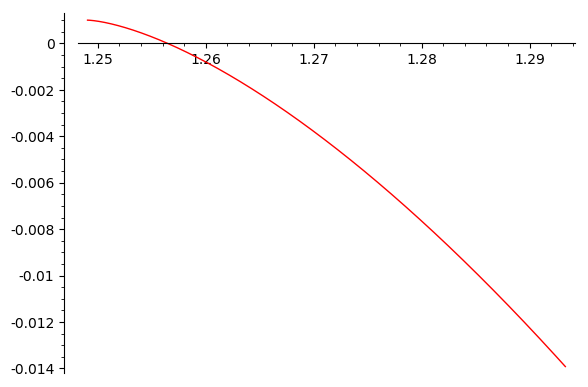

In [21]:
d3 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in taylor3],color='red')
d3

In [22]:
def RungeKutta_sistemas(X,x0,t1,n,alpha,alphamu):
    # Método de Runge-Kutta
    # f campo
    # x0 condición inicial
    # t1 tiempo final
    # n número de pasos del método
    xk = (n+1)*[(0,0,0,0,0,0)]
    h = t1/n
    xk[0] = vector(x0)
    m = len(alphamu)
    tau = (m+1)*[0]
    eta = (m+1)*[(0,0,0,0,0,0)]
    for k in [0..n-1]:
        # eta = xi + h * (sum alpha_mu_k f(theta_mu,eta_mu)  )
        eta[0] = xk[k]
        for mu in [1..m]:
            eta[mu] = xk[k] + h*\
            sum([alphamu[mu-1][i]*X(*eta[i]) for i in [0 .. mu-1]])
        # phi = sum alpha_mu f(tau_mu,eta_mu), mu entre 0 y m
        phi = sum([alpha[mu]*X(*eta[mu]) for mu in [0 .. m]])
        xk[k+1] = xk[k] + h * phi
    return xk

In [23]:
alpha = [1/6,1/3,1/3,1/6]
alphamu = [ [1/2],[0,1/2],[0,0,1] ]


In [24]:
r1=RungeKutta_sistemas(X,x1,8,8000,alpha,alphamu)
r1

[(-1.1363612939916876, 0.05, 0.0, 0.0, 0.0, 0.0),
 (-1.1363609653499147, 0.049999940466321356, 0.0, 0.0006572442120092943, -0.00011928647212449906, 0.0),
 (-1.136359979581512, 0.04999976098883806, 0.0, 0.0013142536781831592, -0.00023988759748712723, 0.0),
 (-1.1363583369199695, 0.049999460252932, 0.0, 0.001971030910701193, -0.0003618033061391447, 0.0),
 (-1.1363560375962645, 0.04999903694405411, 0.0, 0.0026275784215574615, -0.00048503352994374763, 0.0),
 (-1.136353081838863, 0.04999848974772255, 0.0, 0.0032838987226305265, -0.0006095782025796842, 0.0),
 (-1.1363494698737187, 0.04999781734952089, 0.0, 0.00393999432575345, -0.0007354372595448218, 0.0),
 (-1.1363452019242735, 0.049997018435096297, 0.0, 0.004595867742783784, -0.0008626106381596666, 0.0),
 (-1.1363402782114578, 0.049996091690157694, 0.0, 0.005251521485673543, -0.000991098277570836, 0.0),
 (-1.1363346989536895, 0.04999503580047395, 0.0, 0.0059069580665391625, -0.0011209001187544826, 0.0),
 (-1.1363284643668747, 0.04999384945

In [25]:
r2=RungeKutta_sistemas(X,x2,0.01,8000,alpha,alphamu)
r2

[(0.23741823818519336, 0.0, 0.0, 0.0, 0.0, 0.0),
 (0.23741823824167438, -4.70675090795104e-17, 0.0, 0.0000903696174681712, -1.12962021801915e-10, 0.0),
 (0.23741823841111742, -3.76540072719258e-16, 0.0, 0.000180739235149410, -4.51848087340739e-10, 0.0),
 (0.23741823869352247, -1.27082274581218e-15, 0.0, 0.000271108853256783, -1.01665819701571e-9, 0.0),
 (0.23741823908888954, -3.01232058391659e-15, 0.0, 0.000361478472003359, -1.80739235149222e-9, 0.0),
 (0.23741823959721864, -5.88343864358893e-15, 0.0, 0.000451848091602204, -2.82405055170182e-9, 0.0),
 (0.23741824021850977, -1.01665819827164e-14, 0.0, 0.000542217712266386, -4.06663279884222e-9, 0.0),
 (0.23741824095276293, -1.61441556608497e-14, 0.0, 0.000632587334208972, -5.53513909437729e-9, 0.0),
 (0.2374182417999781, -2.40985647395357e-14, 0.0, 0.000722956957643030, -7.22956944003705e-9, 0.0),
 (0.23741824276015533, -3.43122142826501e-14, 0.0, 0.000813326582781628, -9.14992383781769e-9, 0.0),
 (0.23741824383329457, -4.70675093567303

In [26]:
r3=RungeKutta_sistemas(X,x3,0.001,1000,alpha,alphamu)
r3

[(1.249047388880329, 0.001, 0.0, 0.0, 0.0, 0.0),
 (1.249047388880332, 0.0010000000000000007, 0.0, 4.53976679792604e-8, 1.05407149293116e-11, 0.0),
 (1.2490473888803404, 0.0010000000000000026, 0.0, 9.07953359611566e-8, 2.10700804416301e-11, 0.0),
 (1.2490473888803546, 0.0010000000000000059, 0.0, 1.36193003945688e-7, 3.15880965369570e-11, 0.0),
 (1.2490473888803744, 0.0010000000000000104, 0.0, 1.81590671932853e-7, 4.20947632152936e-11, 0.0),
 (1.2490473888804, 0.0010000000000000163, 0.0, 2.26988339922651e-7, 5.25900804766415e-11, 0.0),
 (1.2490473888804312, 0.0010000000000000234, 0.0, 2.72386007915082e-7, 6.30740483210020e-11, 0.0),
 (1.249047388880468, 0.001000000000000032, 0.0, 3.17783675910145e-7, 7.35466667483766e-11, 0.0),
 (1.2490473888805107, 0.0010000000000000417, 0.0, 3.63181343907838e-7, 8.40079357587666e-11, 0.0),
 (1.2490473888805589, 0.0010000000000000527, 0.0, 4.08579011908162e-7, 9.44578553521737e-11, 0.0),
 (1.2490473888806128, 0.001000000000000065, 0.0, 4.53976679911114e

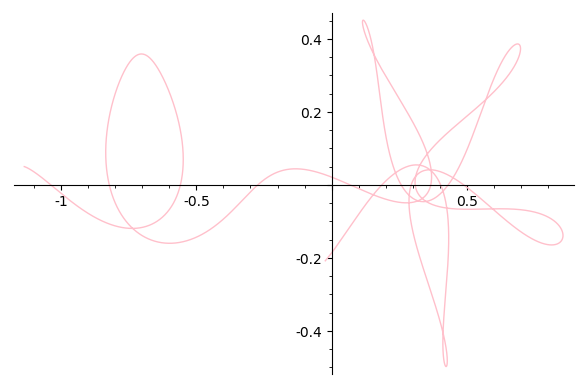

In [27]:
rk1 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in r1],color='pink')
rk1

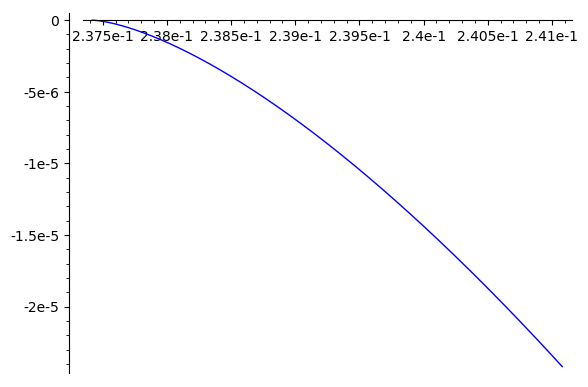

In [28]:
rk2 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in r2],color='blue')
rk2

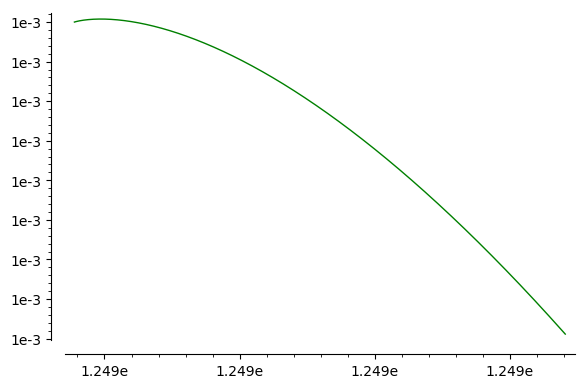

In [29]:
rk3 = line([(xi,yi) for xi,yi,zi,ui,vi,wi in r3],color='green')
rk3

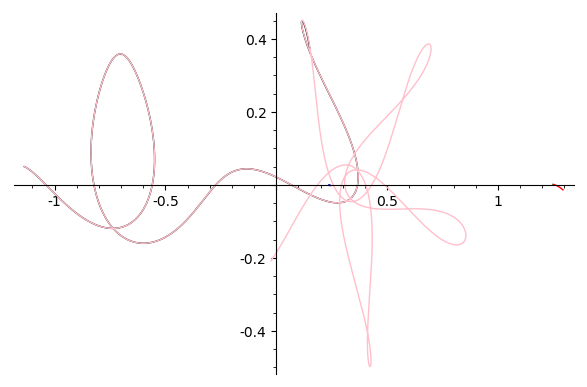

In [30]:
d1 + d2 + d3 + rk1 + rk2 + rk3

In [31]:
#Solo funciona para el primer punto de equilibrio

In [47]:
def error(X,x0,t1,n):
    m = 3
    xk = (n+1)*[(0.,0.,0.,0.,0.,0.)]
    ek = (n+1)*[(0.,0.,0.,0.,0.,0.)]
    h = t1/n
    xk[0] = vector(RDF,x0)
    ek[0] = 0.
    for k in [0..n-1]:
        # Aproximamos por Taylor
        phi = sum([ elemento_serie(X,xk[k],h,j) for j in [0..(m-1)]])
        xk[k+1] = xk[k] + h * phi
        # Aproximamos utilizando un paso de Runge-Kutta para comparar
        xrk = RungeKutta_sistemas(X,xk[k],h,1,alpha,alphamu)[0]
        ek[k+1] = (xk[k+1] - xrk).norm()
    return ek

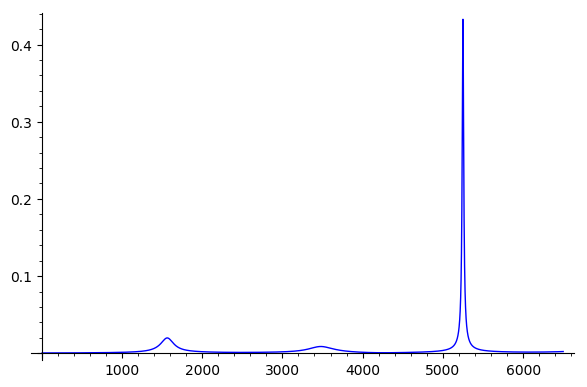

In [52]:
# Vamos a ver el error al comenzar en el primer punto de equilibirio
e1 = error(X,x1,4,6500)
list_plot(e1,plotjoined=true)

Vemos que el error está siendo pequeño, hasta los 5000 pasos. En ese momento habría que tomar un paso menor.

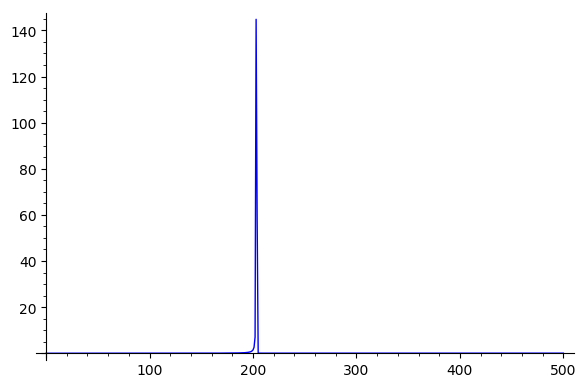

In [55]:
# Vamos a ver el error al comenzar en el segundo punto de equilibirio
list_plot(error(X,x2,0.1,500),plotjoined=true)

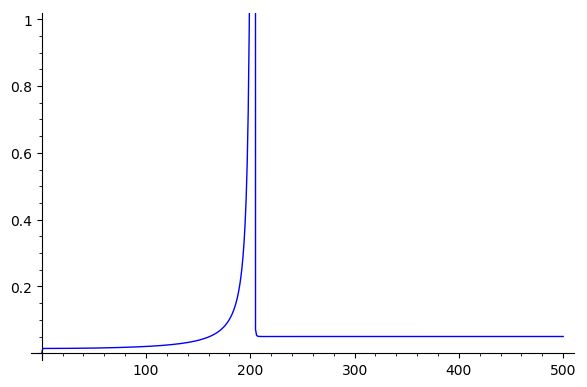

In [54]:
# Vamos a ver el error al comenzar en el segundo punto de equilibirio
list_plot(error(X,x2,0.1,500),plotjoined=true,ymax=1)

Ahora sin embargo vemos que rápidamente se hace muy grande. 